In [1]:
# Import  the appropriate libraries

import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
%matplotlib inline

In [2]:
df = pd.read_excel('Online Retail.xlsx', sheet_name='Online Retail')

In [3]:
# Check the shape
df.shape

(541909, 8)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Distribution of the Quantity Column

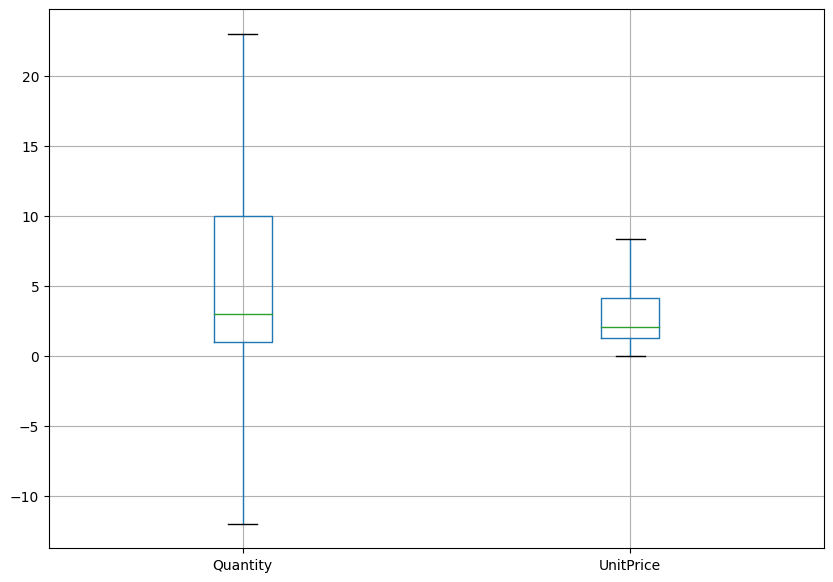

In [5]:
# Create a box plot to identify outliers
ax = df[['Quantity','UnitPrice']].plot.box(
    showfliers=False,
    grid=True,
    figsize=(10, 7)
)

#ax.set_ylabel('Quantity')
#ax.set_title('Quantity Distribution')

#plt.suptitle("")
plt.show()

In [6]:
#Filter Negatives
df = df[df.Quantity >0]
df = df[df.UnitPrice >0]

In [7]:
# Check the shape again
df.shape


(530104, 8)

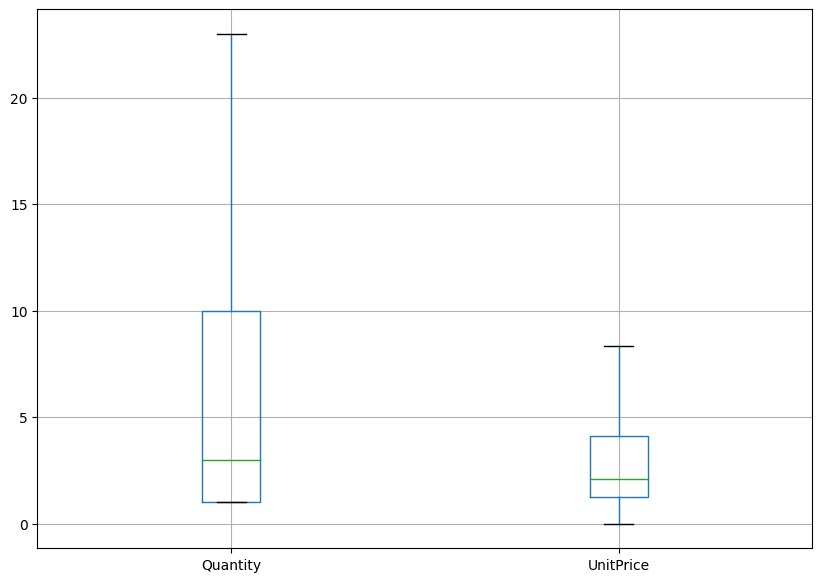

In [8]:
# Create a Box plot without negative quantity
ax = df[['Quantity','UnitPrice']].plot.box(
    showfliers=False,
    grid=True,
    figsize=(10, 7)
)

#ax.set_ylabel('Quantity')
#ax.set_title('Quantity Distribution')

#plt.suptitle("")
plt.show()

Time Series Trends
Number of orders
Revenue

In [9]:
# resample function resamples the data and converts the data into the desired 
# Summarize the data on a monthly basis 
m_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()

In [10]:
m_orders_df

InvoiceDate
2010-12-31    1559
2011-01-31    1086
2011-02-28    1100
2011-03-31    1454
2011-04-30    1246
2011-05-31    1681
2011-06-30    1533
2011-07-31    1475
2011-08-31    1361
2011-09-30    1837
2011-10-31    2040
2011-11-30    2769
2011-12-31     819
Freq: M, Name: InvoiceNo, dtype: int64

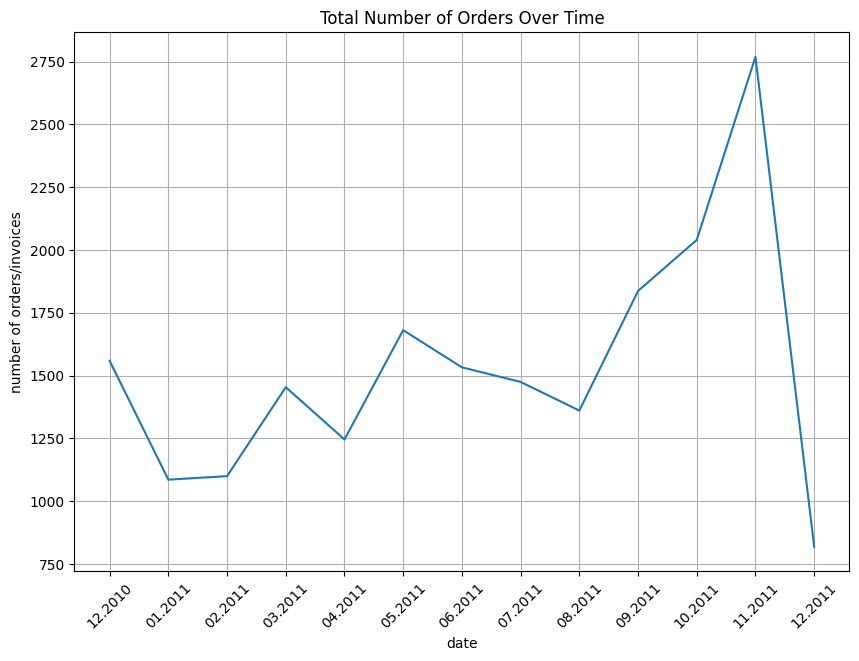

In [11]:
# Create a Line Chart for the data 
ax = pd.DataFrame(m_orders_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

# use x.strftime('%m.%Y'), where x is the Pythondate object, %m is the placeholder for
# the month value, and %Y is the placeholder for the year value. The strftime function
# of the Pythondate object formats the date into the given format.

plt.xticks(
    range(len(m_orders_df.index)), 
    [x.strftime('%m.%Y') for x in m_orders_df.index], 
    rotation=45
)

plt.show()

In [12]:
# Get all invoice dates from December 1, 2011 
invoice_dates = df.loc[
    df['InvoiceDate'] >= '2011-12-01',
    'InvoiceDate'
]

In [13]:
# Print Min and Max dates in that series
print('Min date: %s\nMax date: %s' % (invoice_dates.min(), invoice_dates.max()))

Min date: 2011-12-01 08:33:00
Max date: 2011-12-09 12:50:00


Q. What do you observe?

For the month of December there is business only for first nine days (1-9) - so maybe the store is closed for the year end holidays. to make things simple the data for the month of December is dropped. The data for 12 months starting from Dec 2010 to Nov 2011 is considered.

In [14]:
# Remove the December 2011 data
df = df.loc[df['InvoiceDate'] < '2011-12-01']
# Recalculate the monthly distribution
m_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()

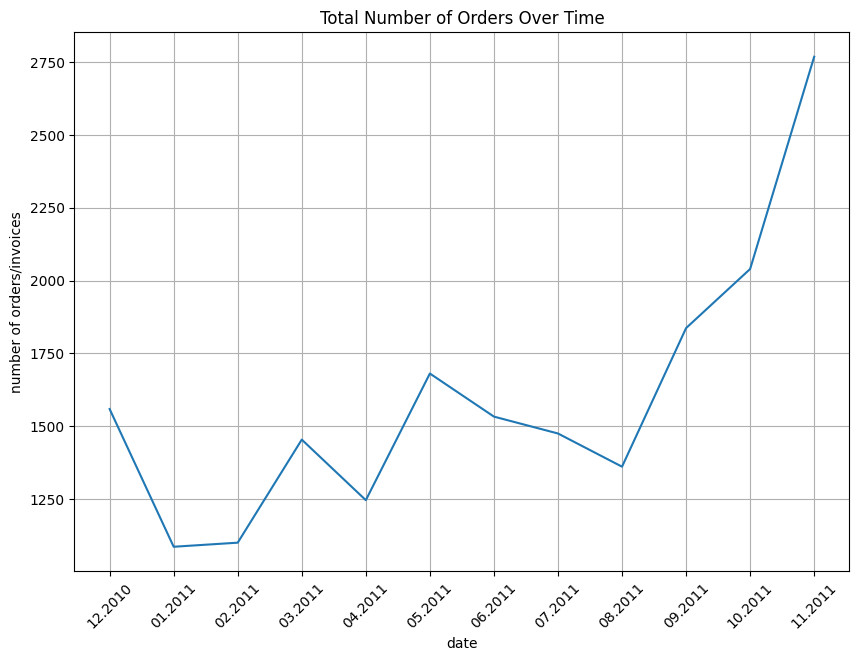

In [15]:
# Create the line chart again
ax = pd.DataFrame(m_orders_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

plt.xticks(
    range(len(m_orders_df.index)), 
    [x.strftime('%m.%Y') for x in m_orders_df.index], 
    rotation=45
)
plt.show()

In [16]:
# Calculate sales
df['Sales'] = df['Quantity'] * df['UnitPrice']
# Look at monthly revenue data by using sum as an aggregate function
m_revenue_df = df.set_index('InvoiceDate')['Sales'].resample('M').sum()

In [17]:
m_revenue_df

InvoiceDate
2010-12-31     823746.140
2011-01-31     691364.560
2011-02-28     523631.890
2011-03-31     717639.360
2011-04-30     537808.621
2011-05-31     770536.020
2011-06-30     761739.900
2011-07-31     719221.191
2011-08-31     759138.380
2011-09-30    1058590.172
2011-10-31    1154979.300
2011-11-30    1509496.330
Freq: M, Name: Sales, dtype: float64

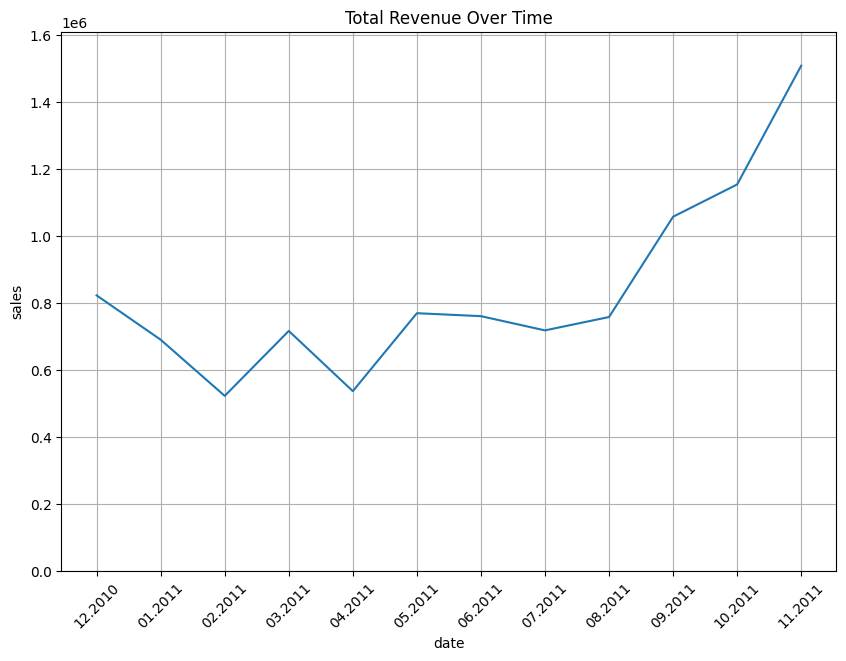

In [18]:
# Create a Line Plot for revenue
# Line Plot
ax = pd.DataFrame(m_revenue_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue Over Time')

ax.set_ylim([0, max(m_revenue_df.values)+100000])

plt.xticks(
    range(len(m_revenue_df.index)), 
    [x.strftime('%m.%Y') for x in m_revenue_df.index], 
    rotation=45
)

plt.show()

Q Do you see a similar pattern with the order by month line chart? Comment

Yes the pattern is similar, as Revenue is (unit price * no. of units), so revenue numbers are impacted by number of units sold in a month. therefore the revenue numbers also follow same pattern

Repeat Customers

In [19]:
# Run the head function on  the original dataframe
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Q. What do you notice with the invoice number?

Under single Invoice number there are multiple products ordered (stock code) for that invoice, so to identify a single row in the dataset a combination of Invoice no. and Stock Code can be used(they act as primary key) 

Calculate the repeat customers

In [20]:
# Aggregate the raw data for each Invoice No.
invoice_df = df.groupby(
    by=['InvoiceNo', 'InvoiceDate']
).agg({
    'Sales': sum,
    'CustomerID': max,
    'Country': max,
}).reset_index()

In [21]:
invoice_df.head()

,InvoiceNo,InvoiceDate,Sales,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850.0,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850.0,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047.0,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047.0,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047.0,United Kingdom


In [22]:
# Aggregate by month
#Group by Month and CustomerID. 
# Filter selects customers who have more than one record in the group
# Basically customers with more than one order in a month

m_repeat_customers_df = invoice_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']

In [23]:
m_repeat_customers_df

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    152
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
Freq: M, Name: CustomerID, dtype: int64

In [24]:
# Calculate the unique customers
m_unique_customers_df = df.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()

In [25]:
m_unique_customers_df

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1664
Freq: M, Name: CustomerID, dtype: int64

In [26]:
# Compare the repeat and unique customers by month and calculate percentage by month
m_percentage_repeat= m_repeat_customers_df/m_unique_customers_df*100
m_percentage_repeat

InvoiceDate
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.052770
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    32.512019
Freq: M, Name: CustomerID, dtype: float64

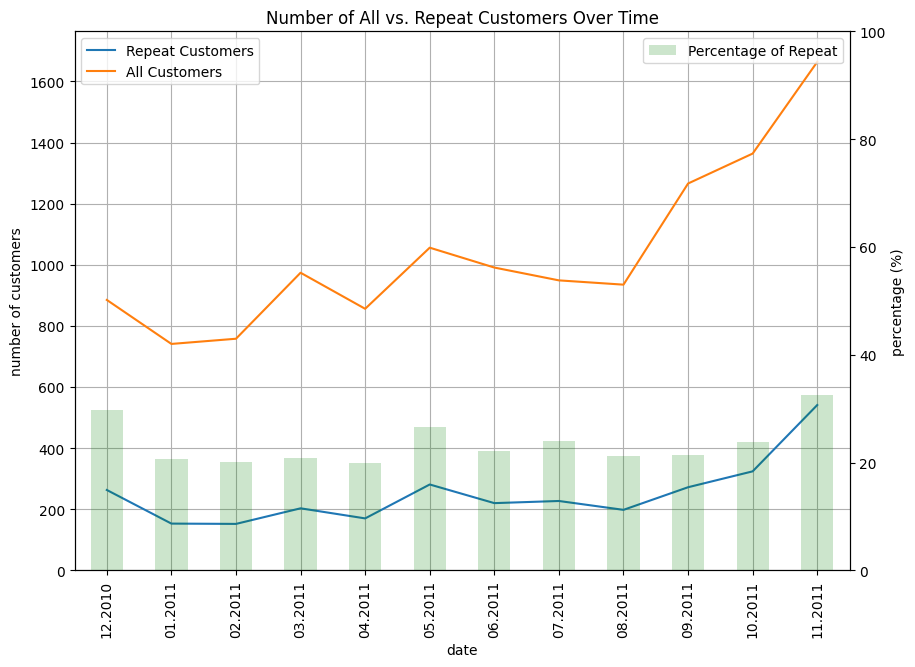

In [27]:
# Visualize thsese two in a dual axis chart

plot1 = pd.DataFrame(m_repeat_customers_df.values).plot(
    figsize=(10,7))

pd.DataFrame(m_unique_customers_df.values).plot(
    ax=plot1,
    grid=True
)

plot2 = pd.DataFrame(m_percentage_repeat.values).plot.bar(
    ax=plot1,
    grid=True,
    secondary_y=True,# for dual axis with different scale
    color='green',
    alpha=0.2
)

plot1.set_xlabel('date')
plot1.set_ylabel('number of customers')
plot1.set_title('Number of All vs. Repeat Customers Over Time')

plot2.set_ylabel('percentage (%)')

plot1.legend(['Repeat Customers', 'All Customers'])
plot2.legend(['Percentage of Repeat'], loc='upper right')

plot1.set_ylim([0, m_unique_customers_df.values.max()+100])
plot2.set_ylim([0, 100])

plt.xticks(
    range(len(m_repeat_customers_df.index)), 
    [x.strftime('%m.%Y') for x in m_repeat_customers_df.index], 
    rotation=45
)
plt.show()

Q. Comment on the distribution?

There is a constant increase in 'All customer' base over the time period - specially the rise is quite steep after October 2011. This may be the effect of Holidays (Halloween, Thanksgiving and Christmas), on the other side the rise is 'Repeated customers' is also constant but its not that steep as all customers (even in months of October to December 2011). Revenue is directly tied up with number of customers so it follows a similar pattern to 'All Customers' graph.

In [28]:
 # Calculate Monthly revenue of repeat customers

m_rev_repeat_customers_df = invoice_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').sum()['Sales']

# Calculate and show the % of revenue for repeat and all customers by month
m_rev_perc_repeat_customers_df = m_rev_repeat_customers_df/m_revenue_df * 100.0
m_rev_perc_repeat_customers_df



InvoiceDate
2010-12-31    43.602098
2011-01-31    32.128346
2011-02-28    36.488853
2011-03-31    37.259729
2011-04-30    36.346420
2011-05-31    49.082331
2011-06-30    49.401017
2011-07-31    44.141497
2011-08-31    41.775552
2011-09-30    47.295296
2011-10-31    49.698455
2011-11-30    47.285696
Freq: M, Name: Sales, dtype: float64

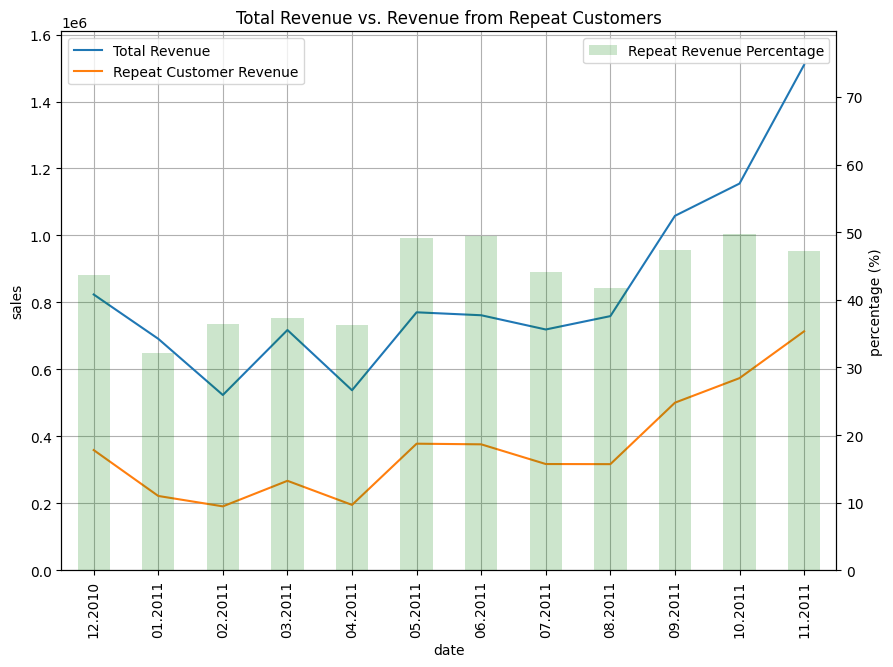

In [29]:
# Plot the  chart for Revenue and % (Dual axis chart)


plot1 = pd.DataFrame(m_revenue_df.values).plot(
    figsize=(10,7))

pd.DataFrame(m_rev_repeat_customers_df.values).plot(
    ax=plot1,
    grid=True
)

plot2 = pd.DataFrame(m_rev_perc_repeat_customers_df.values).plot.bar(
    ax=plot1,
    grid=True,
    secondary_y=True,# for dual axis with different scale
    color='green',
    alpha=0.2
)
plot1.set_xlabel('date')
plot1.set_ylabel('sales')
plot1.set_title('Total Revenue vs. Revenue from Repeat Customers')

plot1.legend(['Total Revenue', 'Repeat Customer Revenue'])

plot1.set_ylim([0, max(m_revenue_df.values)+100000])

plot2.set_ylim([0, max(m_rev_perc_repeat_customers_df.values)+30])
plot2.set_ylabel('percentage (%)')
plot2.legend(['Repeat Revenue Percentage'])

plot2.set_xticklabels([
    x.strftime('%m.%Y') for x in m_rev_perc_repeat_customers_df.index
])

plt.show()

Q. Comment on the distribution

Looking at the graph related to revenue generated by 'All customers' and 'Repeated customers' - the trends on the line graphs is pretty much in line with the total customer count but Repeat revenue percentages are way higher as compared to repeat customer percentages. It is around 40-50 % as compared to 25% repeat customer percentage.

This means all the repeated customers are purchasing more and are contributing high in  the repeated revenue percentage 

Trending Items Over Time (How customers engage with individual products)

By Quantity

In [30]:
# Group the datafarme by month with stock code which is really the product ID
m_item_df = pd.DataFrame(df.set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Quantity'].sum()
                        )

In [31]:
# Lets find out what items were sold the most by quantity on November 30, 2011
# Rank items by the last month sales by sorting by quantity
last_m_sorted_df = m_item_df.loc['2011-11-30'].sort_values(
    by='Quantity', ascending=False
).reset_index()

By Sales

In [32]:
# Group the datafarme by month with stock code which is really the product ID and 
# calculate the sales
# Group the datafarme by month with stock code which is really the product ID and 
# calculate the sales
m_rev_df = pd.DataFrame(df.set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Sales'].sum()
                        )

# Lets find out what items were sold the most by sales on November 30, 2011
last_m_rev_sorted_df = m_rev_df.loc['2011-11-30'].sort_values(
    by='Sales', ascending=False
).reset_index()

In [33]:
# Print both the dataframes
print(last_m_sorted_df.head())
print(last_m_rev_sorted_df.head())

  InvoiceDate StockCode  Quantity
0  2011-11-30     23084     14954
1  2011-11-30     22197     12460
2  2011-11-30     22086      7908
3  2011-11-30    85099B      5909
4  2011-11-30     22578      5366
  InvoiceDate StockCode     Sales
0  2011-11-30       DOT  36905.40
1  2011-11-30     23084  34556.72
2  2011-11-30     22086  28985.04
3  2011-11-30     22197  14195.60
4  2011-11-30    85123A  14136.70


In [47]:
# Use the top 5 items by quantity and find the monthly sales for those items 
m_item_df = pd.DataFrame(
    df.loc[
        df['StockCode'].isin([23084, 22578, 22197, 22086, '85099B'])
    ].set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Sales'].sum()
)
m_item_df

Sales
InvoiceDate StockCode          
2010-12-31  22086       4614.15
            22197       1645.82
            22578        112.20
            85099B      3619.20
2011-01-31  22197       1299.45
            85099B      4542.75
2011-02-28  22086          5.90
            22197       1864.57
            85099B      5191.05
2011-03-31  22086        218.75
            22197       1575.50
            85099B      8496.88
2011-04-30  22086         32.45
            22197       1384.73
            85099B      4141.78
2011-05-31  22086         35.40
            22197       4978.50
            23084       2161.70
            85099B      6585.20
2011-06-30  22086        866.15
            22197       1552.85
            23084       3005.12
            85099B      6628.42
2011-07-31  22086       1023.30
            22197       1397.27
            22578         90.95
            23084        435.20
            85099B      5654.60
2011-08-31  22086       1272.00
            22197       3916.42
            22578         11.05
            23084       3395.20
            85099B      9871.44
2011-09-30  22086       5742.76
            22197       2881.98
            22578        418.85
            23084        235.14
            85099B      7992.01
2011-10-31  22086       8854.49
            22197       4260.76
            22578        679.59
            23084      11955.35
            85099B      9763.06
2011-11-30  22086      16139.01
            22197       6476.38
            22578       1473.35
            23084      23268.73
            85099B     10713.99

In [48]:
# transform this data into a tabular format where columns are the individual 
# stock codes and the rows are the invoice dates
itmes_df = m_item_df.reset_index().pivot('InvoiceDate','StockCode').fillna(0)
itmes_df = itmes_df.reset_index()
itmes_df = itmes_df.set_index('InvoiceDate')
itmes_df.columns = itmes_df.columns.droplevel(0)

In [49]:
itmes_df

StockCode,22086,22197,22578,23084,85099B
InvoiceDate,,,,,
2010-12-31,4614.15,1645.82,112.20,0.00,3619.20
2011-01-31,0.00,1299.45,0.00,0.00,4542.75
2011-02-28,5.90,1864.57,0.00,0.00,5191.05
2011-03-31,218.75,1575.50,0.00,0.00,8496.88
2011-04-30,32.45,1384.73,0.00,0.00,4141.78
2011-05-31,35.40,4978.50,0.00,2161.70,6585.20
2011-06-30,866.15,1552.85,0.00,3005.12,6628.42
2011-07-31,1023.30,1397.27,90.95,435.20,5654.60
2011-08-31,1272.00,3916.42,11.05,3395.20,9871.44


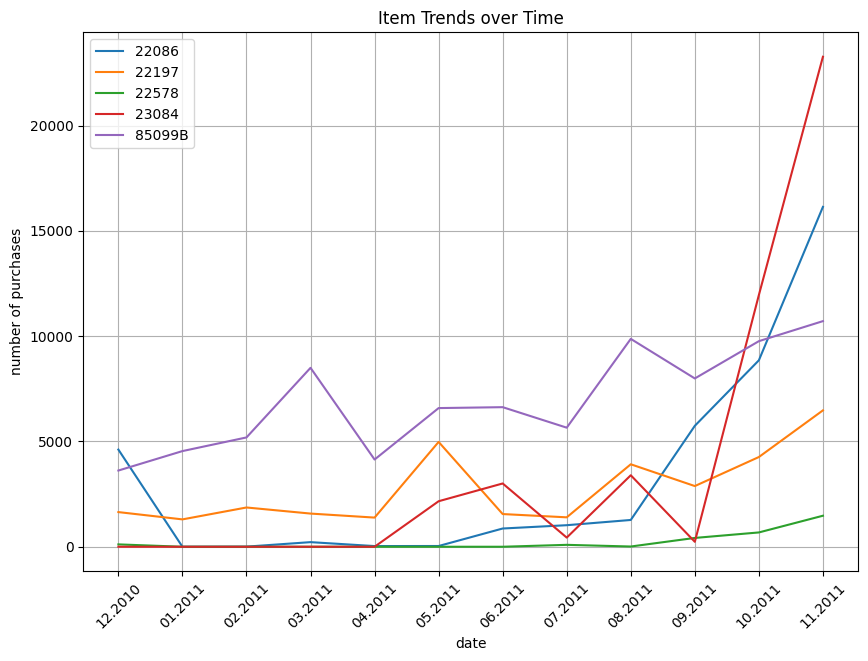

In [50]:
# Time series plot for the top 5 items
plot1 = pd.DataFrame(itmes_df.values).plot(
    figsize=(10,7),
    grid=True,
)

plot1.set_ylabel('number of purchases')
plot1.set_xlabel('date')
plot1.set_title('Item Trends over Time')

plot1.legend(itmes_df.columns, loc='upper left')

plt.xticks(
    range(len(itmes_df.index)), 
    [x.strftime('%m.%Y') for x in itmes_df.index], 
    rotation=45
)

plt.show()

Q. What do you observe?

the above graph shows the top 5 products by units sold over the last one year (monthly). 22086 and 23084 are two stock codes or products which seems to be totally seasonal and sales really pick up in later part of the year (October/November). rest of the products seems to be pretty stable and on constant rise 

In [57]:
print(last_m_sorted_df.head())
print(last_m_rev_sorted_df.head())

  InvoiceDate StockCode  Quantity
0  2011-11-30     23084     14954
1  2011-11-30     22197     12460
2  2011-11-30     22086      7908
3  2011-11-30    85099B      5909
4  2011-11-30     22578      5366
  InvoiceDate StockCode     Sales
0  2011-11-30       DOT  36905.40
1  2011-11-30     23084  34556.72
2  2011-11-30     22086  28985.04
3  2011-11-30     22197  14195.60
4  2011-11-30    85123A  14136.70


In [61]:
# Use the top 5 items by sales and find the monthly sales for those items 
m_sales_df = pd.DataFrame(
    df.loc[
        df['StockCode'].isin(['DOT', 23084, 22086, 22197, '85123A'])
    ].set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Sales'].sum()
)
m_sales_df

Sales
InvoiceDate StockCode          
2010-12-31  22086       4614.15
            22197       1645.82
            85123A      9602.05
2011-01-31  22197       1299.45
            85123A     14979.75
2011-02-28  22086          5.90
            22197       1864.57
            85123A      4912.65
2011-03-31  22086        218.75
            22197       1575.50
            85123A      5262.50
2011-04-30  22086         32.45
            22197       1384.73
            85123A      9581.65
2011-05-31  22086         35.40
            22197       4978.50
            23084       2161.70
            85123A     10700.42
2011-06-30  22086        866.15
            22197       1552.85
            23084       3005.12
            85123A      4401.90
2011-07-31  22086       1023.30
            22197       1397.27
            23084        435.20
            85123A      8303.97
2011-08-31  22086       1272.00
            22197       3916.42
            23084       3395.20
            85123A      5498.10
            DOT           11.17
2011-09-30  22086       5742.76
            22197       2881.98
            23084        235.14
            85123A      6789.00
            DOT         1681.83
2011-10-31  22086       8854.49
            22197       4260.76
            23084      11955.35
            85123A      4564.54
            DOT         3408.76
2011-11-30  22086      16139.01
            22197       6476.38
            23084      23268.73
            85123A     13855.83
            DOT         5205.34

In [59]:
# transform this data into a tabular format where columns are the individual 
# stock codes and the rows are the invoice dates
s_itmes_df = m_sales_df.reset_index().pivot('InvoiceDate','StockCode').fillna(0)
s_itmes_df = s_itmes_df.reset_index()
s_itmes_df = s_itmes_df.set_index('InvoiceDate')
s_itmes_df.columns = s_itmes_df.columns.droplevel(0)

s_itmes_df

StockCode,22086,22197,23084,85123A,DOT
InvoiceDate,,,,,
2010-12-31,4614.15,1645.82,0.00,9602.05,0.00
2011-01-31,0.00,1299.45,0.00,14979.75,0.00
2011-02-28,5.90,1864.57,0.00,4912.65,0.00
2011-03-31,218.75,1575.50,0.00,5262.50,0.00
2011-04-30,32.45,1384.73,0.00,9581.65,0.00
2011-05-31,35.40,4978.50,2161.70,10700.42,0.00
2011-06-30,866.15,1552.85,3005.12,4401.90,0.00
2011-07-31,1023.30,1397.27,435.20,8303.97,0.00
2011-08-31,1272.00,3916.42,3395.20,5498.10,11.17


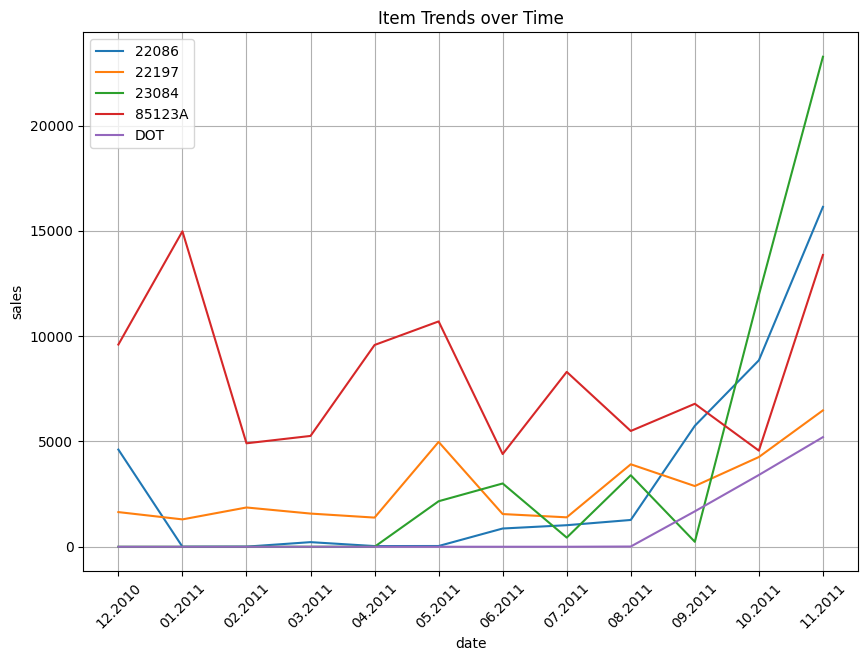

In [60]:
# Time series plot for the top 5 items
plot1 = pd.DataFrame(s_itmes_df.values).plot(
    figsize=(10,7),
    grid=True,
)

plot1.set_ylabel('sales')
plot1.set_xlabel('date')
plot1.set_title('Item Trends over Time')

plot1.legend(s_itmes_df.columns, loc='upper left')

plt.xticks(
    range(len(s_itmes_df.index)), 
    [x.strftime('%m.%Y') for x in s_itmes_df.index], 
    rotation=45
)

plt.show()

Q. What do you observe?

Similar to quantity line graph, sales also follows a trend - as quantity and sales are connected most of same products feature here except some. Most of the gross sales pick up at the end of the year. 

In [62]:
# Drop NaN records
df = df[pd.notnull(df['CustomerID'])]

In [63]:
df.shape

(380580, 9)

In [64]:
 # Summarize the data for each order or InvoiceNo

orders_df = df.groupby(['CustomerID', 'InvoiceNo']).agg({
            'Sales': sum,
            'InvoiceDate': max
        })

In [65]:
orders_df

Sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00
...                        ...                 ...
18283.0    578262       313.65 2011-11-23 13:27:00
           579673       223.61 2011-11-30 12:59:00
18287.0    554065       765.28 2011-05-22 10:39:00
           570715      1001.32 2011-10-12 10:23:00
           573167        70.68 2011-10-28 09:29:00

[17754 rows x 2 columns]

Q. Comment on the results of product analytics and Customer Analytics from a marketing perspective

majorly 4 type of analysis were performed in the whole exercise,  %age of Returning customers every month, %age repeated revenue generated every month, top products by their units sold every month and Sales generated by top products over the year every month.  The results and trends from these graphs shows below observations from Marketing perspectives

1. Overall the total customer base increases over the whole year (except some dip in the middle of the year) and the highest rise at the end of the year

undefined. %age of Repeated/returning customers is maximum at the end of the year (month 10-11) and it remains nearly constant during other months

undefined. Total revenues are constantly on a rise but this is maximum contributed by the returning customers. Returning/Repeated customers contribute for almost 50% of the revenue every month. So store should take special attention of the returning 20-25% of the customers as they purchase bigger than before and almost contribute half of the increased revenue.

undefined. from the product side Units sold and Sales are connected but that does not mean that the product which is sold most also generate highest revenues, because this also depends upon the unit price of the products.

undefined. there is a Product 'DOT' which seems to be shipping and postage and that contributes to lot of sales but quantity of only 1 every invoice. also there is no customer associated with it, so it seems not to be a product but some services (like postage)

undefined. Most of the sales revenue is generated at the end of the year and also DOT kicks up that time, maybe the store has online sales during holidays and thus only ships that time of the year    

Keeping all the above points in mind, Store should look into some changes like taking care of the repeating customers all round the year (to raise revenues even in middle of the year), also if the store can do the online sales whole year long this can surely raise revenues for the store.   

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bf774db2-d69d-4c68-9d3d-54c7625b552d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>